# Librerías

In [1]:
#Importamos las librerías estándar
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Conexión al repositorio de datos

In [2]:
#Nos conectamos a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura del dataset MNIST

In [3]:
#Existe un dataset de números escritos de manera manual
#Ese dataset se llama MNIST [Modified National Institute of Standards and Technology database]
#Los features son un conjunto de imágenes y los labels son el número que representa la imagen
#Vamos a crear una red neuronal que clasifique estos números

In [4]:
#Para estar evitando el convertir las imágenes a tensores, usaremos este dataset de pruebas
#Vamos a importarlo
#En total tiene 70000 imágenes
from keras.datasets import mnist

In [5]:
#Importamos los datos de entrenamiento y testing
#La extensión NPZ significa "NumPy Zip", es un array de numpy comprimido
#La librería colocará las imágenes en el disco "/tmp"
#Luego con la función "load_data" dividimos los datos en entrenamiento y validación
#Esta función es propia de "Mnist"
(x_train, y_train), (x_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
#Tenemos 60 mil imágenes de 28x28 píxeles que representan números escritos a mano
x_train.shape

(60000, 28, 28)

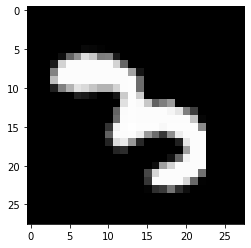

In [15]:
#Podemos pintar una imagen
plt.imshow(x_train[10210], cmap = 'gray')

### el -1 permite mantener los valores, porque hay frameworks que no traen la cantidad de imagenes.

In [17]:
#Tenemos que representar este dataset como un tensor de orden 4 del tipo: (dataset, filas, columnas, canales)
x_tensor_train = x_train.reshape(-1, 28, 28, 1)
x_tensor_train.shape

(60000, 28, 28, 1)

###Se escalan los valores que estan enre 0 y 255, dividiendolo entre 255, para dejarlos entre numeros entre 0 y 1.

In [18]:
#Escalamos los features de entrenamiento
x_tensor_train_scale = x_tensor_train.astype('float32') / 255.0
x_tensor_train_scale.shape

(60000, 28, 28, 1)

### Hay que hacer los mismo con las imagenes de validación.

In [19]:
#Tenemos 10 mil imágenes de 28x28 píxeles que representan números escritos a mano para los datos de validacion
x_test.shape

(10000, 28, 28)

In [20]:
#Hacemos lo mismo con los datos de validación
x_tensor_test = x_test.reshape(-1, 28, 28, 1)
x_tensor_test.shape

(10000, 28, 28, 1)

In [21]:
#Escalamos los features de validacion
x_tensor_test_scale = x_tensor_test.astype('float32') / 255.0
x_tensor_test_scale.shape

(10000, 28, 28, 1)

# Procesamiento de labels

In [22]:
#Cada imagen tiene un número asociado que indica qué significa el número escrito a mano
#Por ejemplo, la primera imágen corresponde al número 5, la segunda al número 0
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
#Consultamos la dimensionalidad
y_train.shape

(60000,)

In [ ]:
#En total tenemos labels que van del 0 al 9, por lo tanto tenemos 10 categorías
#Nuestra red neuronal necesitará de la función softmax y de 10 neuronas de salida en la última capa
#Tenemos que categorizar el label para tener 10 categorías diferentes, una para cada neurona de salida

In [24]:
#Importamos la librería que categoriza
from keras.utils.np_utils import to_categorical

In [25]:
#Categorizamos los labels de entrenamiento
y_train_categorico = to_categorical(y_train)
y_train_categorico.shape

(60000, 10)

In [26]:
#Por ejemplo, vemos que en la primera imagen, su label asociado está activado en el índice 5, entonces la imagen es un número 5
y_train_categorico[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [27]:
#Hacemos lo mismo con los labels de validación
y_test_categorico = to_categorical(y_test)
y_test_categorico.shape

(10000, 10)

# Construcción de Red Convolucional para encontrar patrones visuales

In [28]:
#Importamos las librerías para definir modelos de Deep Learning
from keras.models import Sequential

In [29]:
#Importamos los objetos que nos permiten definir una capa convolucional para procesar imágenes en 2D
from keras.layers import Conv2D

In [30]:
#Instaciamos un modelo vacío
model = Sequential()

In [31]:
#Agregamos una capa, de 16 filtros, cada filtro de 4x4
#El input es una imagen de 28x28 pixeles de 1 canal de color
### Para las capas y los filtros se recomiendan potencias de 2
model.add(Conv2D(16, (4, 4), input_shape=(28, 28, 1)))

In [32]:
# Aqui no se indica el input_shape, porque se va a recibir lo que genere la capa anterior.
model.add(Conv2D(4, (4, 4)))

# Vectorizacion de los patrones visuales

In [33]:
#Ahora los tensores patrones encontrados para cada imagen, los tenemos que convertir a vectores de features
#Importamos la función que vectoriza los tensores
from keras.layers import Flatten

In [34]:
#Vectorizamos los patrones
model.add(Flatten())

# Red neuronal para clasificar los patrones

In [35]:
#Importamos el objeto para definir capas de redes neuronales
from keras.layers import Dense

In [36]:
#Agregamos capas de nuestra red neuronal, 128 neuronas
model.add(Dense(128, activation='relu'))

In [37]:
#Como estamos clasificando, agregamos una capa de salida de 10 neuronas con softmax
# Cada imagen representa un numero por eso son 10 de salida
model.add(Dense(10, activation='softmax'))

# Compilación del modelo de Deep Learning (Red Convolucional + Red Neuronal)

In [38]:
#Compilamos
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo

In [39]:
#AL ejecutarlo, notamos que se entrena muy lento
#Esto se debe a la gran cantidad de información que se está procesando, matricialmente cada imagen es de 28x28, 
#Verbose=1, para que muestre como se ecjecuta el modelo.
model.fit(x_tensor_train_scale, y_train_categorico, batch_size=128, epochs=2, verbose=1)

Epoch 1/2
469/469 [==============================] - 64s 134ms/step - loss: 0.2186 - accuracy: 0.9332
Epoch 2/2
469/469 [==============================] - 63s 134ms/step - loss: 0.0917 - accuracy: 0.9723


# Uso del modelo en un archivo

In [40]:
#Importamos la libreria de imagenes
from keras.preprocessing import image

In [41]:
#Leemos la imagen
imagen = image.load_img(
  '/content/drive/MyDrive/Data/imagen_5.png', 
  grayscale=False,
  color_mode="grayscale",
  target_size = (28, 28),
  interpolation="nearest"
)

In [42]:
imagen

In [43]:
#La convertimos en un tensor
tensor = np.array([
  image.img_to_array(imagen)
])

In [44]:
#Vemos el tensor
tensor.shape

(1, 28, 28, 1)

In [45]:
#Usamos el modelo para predecir
predicciones_labels = model.predict(tensor)
predicciones_labels

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [46]:
#Obtenemos el índice del array de predicciones para saber a qué categoría pertenece
predicciones = predicciones_labels.argmax()
predicciones

5

In [78]:
#Leemos la imagen
imagen = image.load_img(
  '/content/drive/MyDrive/Data/PruebaDe7.PNG', 
  grayscale=False,
  color_mode="grayscale",
  target_size = (28, 28),
  interpolation="nearest"
)
imagen

In [79]:
#La convertimos en un tensor
tensor = np.array([
  image.img_to_array(imagen)
])

In [80]:
#Vemos el tensor
tensor.shape

(1, 28, 28, 1)

In [81]:
#Usamos el modelo para predecir
predicciones_labels = model.predict(tensor)
predicciones_labels

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [82]:
#Obtenemos el índice del array de predicciones para saber a qué categoría pertenece
predicciones = predicciones_labels.argmax()
predicciones

3